# A minimal example of tensorflow API

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

## Define build function

In [8]:
from typing import List
from tensorflow.contrib import slim
import tensorflow as tf

def vgg_feature_extractor(input_image: tf.Tensor) -> List[tf.Tensor]:
    """
    A function which accepts image tensor [1, width, height, num_channels] and 
    returns a list of feature maps of shape [1, fm_width, fm_height, fm_channels]
    """
    
    def linear(x):
        return x
    
    with slim.arg_scope([slim.conv2d],
                          activation_fn=linear,
                          weights_initializer=tf.constant_initializer(0.001),
                          biases_initializer=tf.constant_initializer(0.0)):
        
        net = slim.repeat(input_image, 2, slim.conv2d, 64, [3, 3], scope='conv1')
        net = slim.avg_pool2d(net, [2, 2], scope='pool1')
        net = slim.repeat(net, 2, slim.conv2d, 128, [3, 3], scope='conv2')
        net = slim.avg_pool2d(net, [2, 2], scope='pool2')
        net = slim.repeat(net, 3, slim.conv2d, 256, [3, 3], scope='conv3')
        net = slim.avg_pool2d(net, [2, 2], scope='pool3')
        net = slim.repeat(net, 3, slim.conv2d, 512, [3, 3], scope='conv4')
        fm0 = net # first feature map
        net = slim.avg_pool2d(net, [2, 2], scope='pool4')
        net = slim.repeat(net, 3, slim.conv2d, 512, [3, 3], scope='conv5')
        fm1 = net # second feature map
    
    return [fm0, fm1]

## Load example image for receptive field visualization

Here we use tile_factor equal to 1, since we know that the final receptive field of the last feature map is bigger than 96x96.

In [9]:
from receptivefield.image import get_default_image
image = get_default_image(shape=(96, 96), tile_factor=1, name="cat")
image.shape

(288, 288, 3)

## Compute receptive field using TFFeatureMapsReceptiveField

In [10]:
from receptivefield.tensorflow import TFFeatureMapsReceptiveField

rf = TFFeatureMapsReceptiveField(vgg_feature_extractor)
rf_params = rf.compute(input_shape=image.shape)

[2018-07-20 12:20:04,349][ INFO][tensorflow.py]::Feature maps shape: [(1, 36, 36, 1), (1, 18, 18, 1)]
[2018-07-20 12:20:04,350][ INFO][tensorflow.py]::Input shape       : [1, 288, 288, 3]
[2018-07-20 12:20:04,947][ INFO][base.py]::Estimated receptive field for feature map [0]: ReceptiveFieldDescription(offset=(4.0, 4.0), stride=(8.0, 8.0), size=Size(w=92, h=92))
[2018-07-20 12:20:04,948][ INFO][base.py]::Estimated receptive field for feature map [1]: ReceptiveFieldDescription(offset=(8.0, 8.0), stride=(16.0, 16.0), size=Size(w=196, h=196))


In [11]:
# print computed receptive fields
rf.feature_maps_desc

[FeatureMapDescription(size=Size(w=36, h=36), rf=ReceptiveFieldDescription(offset=(4.0, 4.0), stride=(8.0, 8.0), size=Size(w=92, h=92))),
 FeatureMapDescription(size=Size(w=18, h=18), rf=ReceptiveFieldDescription(offset=(8.0, 8.0), stride=(16.0, 16.0), size=Size(w=196, h=196)))]

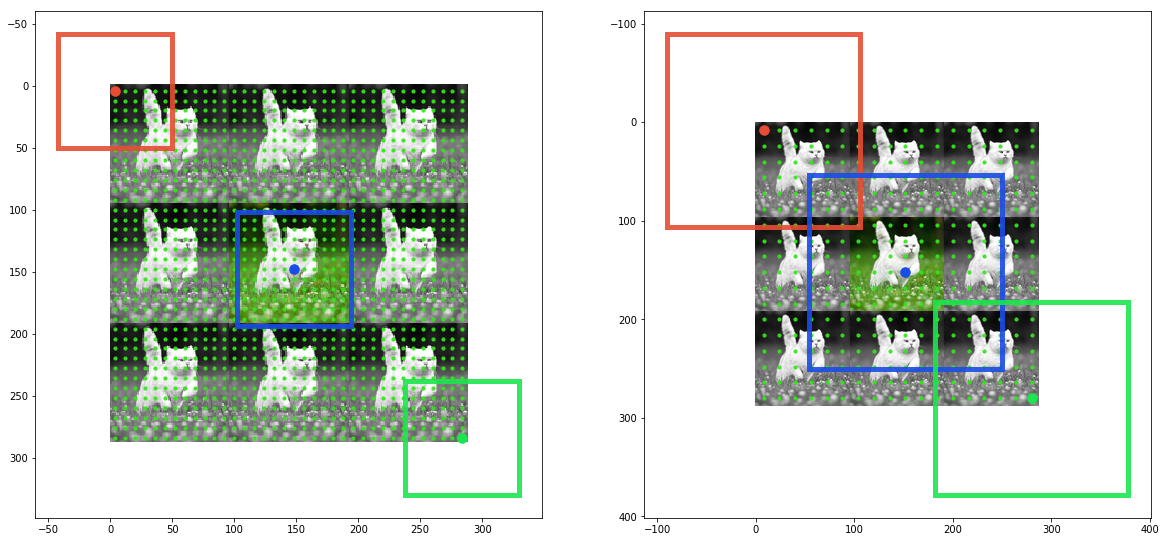

In [12]:
rf.plot_rf_grids(custom_image=image, figsize=(20, 12), layout=(1, 2))
plt.savefig("../img/demo_minimal_tf.jpg", dpi=126)